# 🏆 Mumbai Indians: The DNA of Champions (Detailed Analysis)

## 📊 Winning vs. Non-Winning Years: The Comprehensive Comparison
This notebook performs a deep-dive analysis to understand exactly **what changed** when Mumbai Indians won the trophy versus when they didn't. We compare the **5 Champion Seasons (2013, 2015, 2017, 2019, 2020)** against the non-winning years.

### 🔍 Analysis Modules:
1.  **Core Metrics**: Batting & Bowling Averages.
2.  **Phase Dominance**: Powerplay & Death Overs comparison.
3.  **Strategic Strength**: Chasing vs. Defending records.
4.  **Fortress Wankhede**: Home ground performance.
5.  **The Toss Factor**: Luck vs. Skill.
6.  **Champion Heroes**: The players who stepped up.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (14, 7)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titleweight"] = "bold"

# Brand Colors
MI_BLUE = "#004BA0"
MI_GOLD = "#D1AB3E"
MI_PALETTE = [MI_BLUE, "#A9A9A9"] # Blue for Champions, Gray for Others

print("Libraries Loaded & Theme Set.")

Libraries Loaded & Theme Set.


In [ ]:
# --- Data Loading & Prep ---
try:
    df = pd.read_csv("IPL.csv", low_memory=False)
    print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ Error: IPL.csv not found. Please ensure the data file is in the directory.")

# Helper: Clean Season Year
def clean_season(s):
    s = str(s)
    if "/" in s:
        return int(s.split("/")[0])
    try:
        return int(s)
    except ValueError:
        return 0

df["season_year"] = df["season"].apply(clean_season)

# Define Champion Years
CHAMPION_YEARS = [2013, 2015, 2017, 2019, 2020]
df["is_champion_year"] = df["season_year"].isin(CHAMPION_YEARS)
df["period"] = df["is_champion_year"].map({True: "🏆 Champion Years", False: "Other Years"})

# Pre-calculate some columns
df["is_wicket"] = df["wicket_kind"].notna().astype(int)
df["is_dot"] = (df["runs_total"] == 0).astype(int)
df["is_four"] = (df["runs_batter"] == 4).astype(int)
df["is_six"] = (df["runs_batter"] == 6).astype(int)

print("Data Preparation Complete.")

Dataset loaded: 278205 rows, 64 columns
Data Preparation Complete.


## 1. 📈 The Statistical Baseline
Did MI score more runs per wicket or concede fewer runs per wicket in winning years?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\37912472.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bat_metrics, x="period", y="avg", ax=ax[0], palette=MI_PALETTE)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\37912472.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bat_metrics, x="period", y="sr", ax=ax[1], palette=MI_PALETTE)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\37912472.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bowl_metrics, x="period", y="avg", ax=ax[2], palette=MI_PALETTE)
C:\User

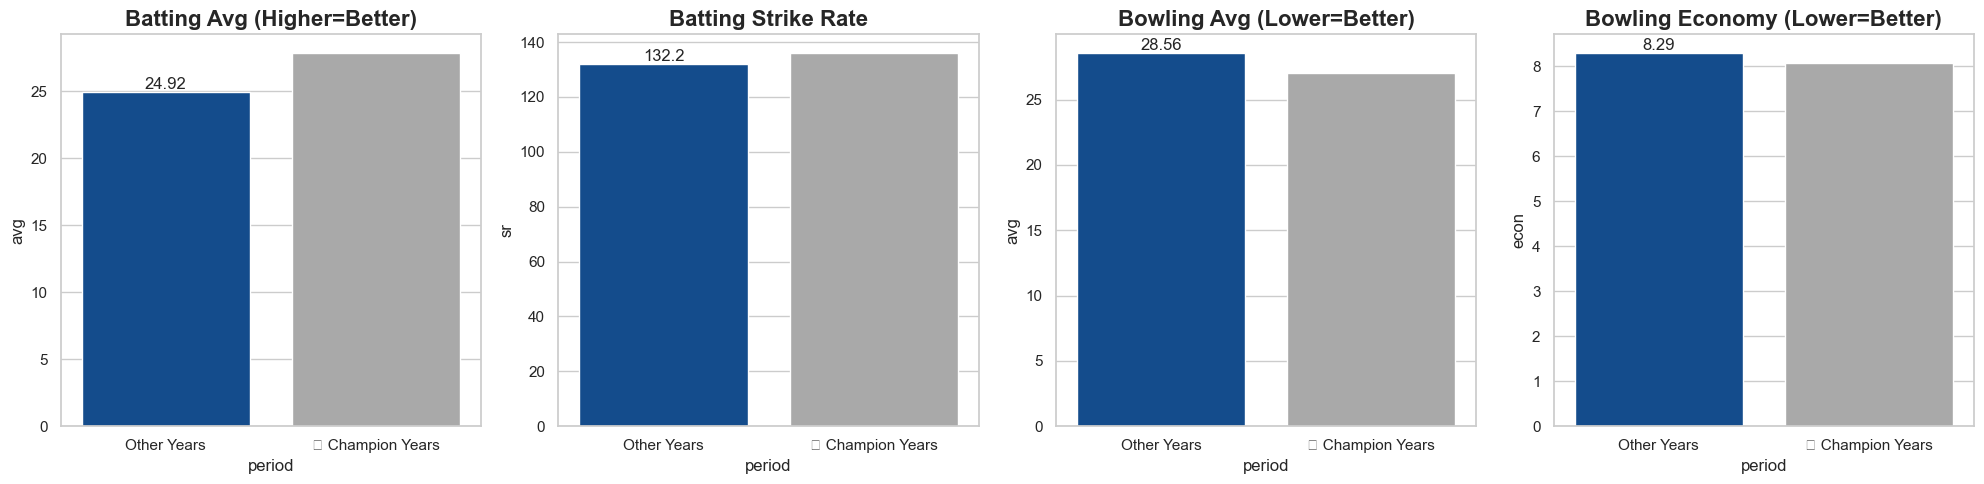

In [ ]:
# --- Batting Overall ---
mi_bat = df[df["batting_team"] == "Mumbai Indians"].copy()
bat_metrics = mi_bat.groupby("period").agg(
    runs=("runs_batter", "sum"),
    wickets=("is_wicket", "sum"),
    balls=("valid_ball", "sum")
).reset_index()
bat_metrics["avg"] = bat_metrics["runs"] / bat_metrics["wickets"]
bat_metrics["sr"] = (bat_metrics["runs"] / bat_metrics["balls"]) * 100

# --- Bowling Overall ---
mi_bowling = df[df["bowling_team"] == "Mumbai Indians"].copy()
bowl_metrics = mi_bowling.groupby("period").agg(
    runs_conceded=("runs_total", "sum"),
    wickets=("bowler_wicket", "sum"),
    balls=("valid_ball", "sum")
).reset_index()
bowl_metrics["avg"] = bowl_metrics["runs_conceded"] / bowl_metrics["wickets"]
bowl_metrics["econ"] = (bowl_metrics["runs_conceded"] / bowl_metrics["balls"]) * 6

# --- Visualization ---
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.barplot(data=bat_metrics, x="period", y="avg", ax=ax[0], palette=MI_PALETTE)
ax[0].set_title("Batting Avg (Higher=Better)")
ax[0].bar_label(ax[0].containers[0], fmt="%.2f")

sns.barplot(data=bat_metrics, x="period", y="sr", ax=ax[1], palette=MI_PALETTE)
ax[1].set_title("Batting Strike Rate")
ax[1].bar_label(ax[1].containers[0], fmt="%.1f")

sns.barplot(data=bowl_metrics, x="period", y="avg", ax=ax[2], palette=MI_PALETTE)
ax[2].set_title("Bowling Avg (Lower=Better)")
ax[2].bar_label(ax[2].containers[0], fmt="%.2f")

sns.barplot(data=bowl_metrics, x="period", y="econ", ax=ax[3], palette=MI_PALETTE)
ax[3].set_title("Bowling Economy (Lower=Better)")
ax[3].bar_label(ax[3].containers[0], fmt="%.2f")

plt.tight_layout()
plt.show()

## 2. ⚡ Phase Analysis: Powerplay & Death
Champions are often defined by how they start (Powerplay) and how they finish (Death Overs). This section separates the game into phases.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\2418446605.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pp_bat, x="period", y="rpo", ax=ax[0], palette=MI_PALETTE)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\2418446605.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=death_bowl, x="period", y="econ", ax=ax[1], palette=MI_PALETTE)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


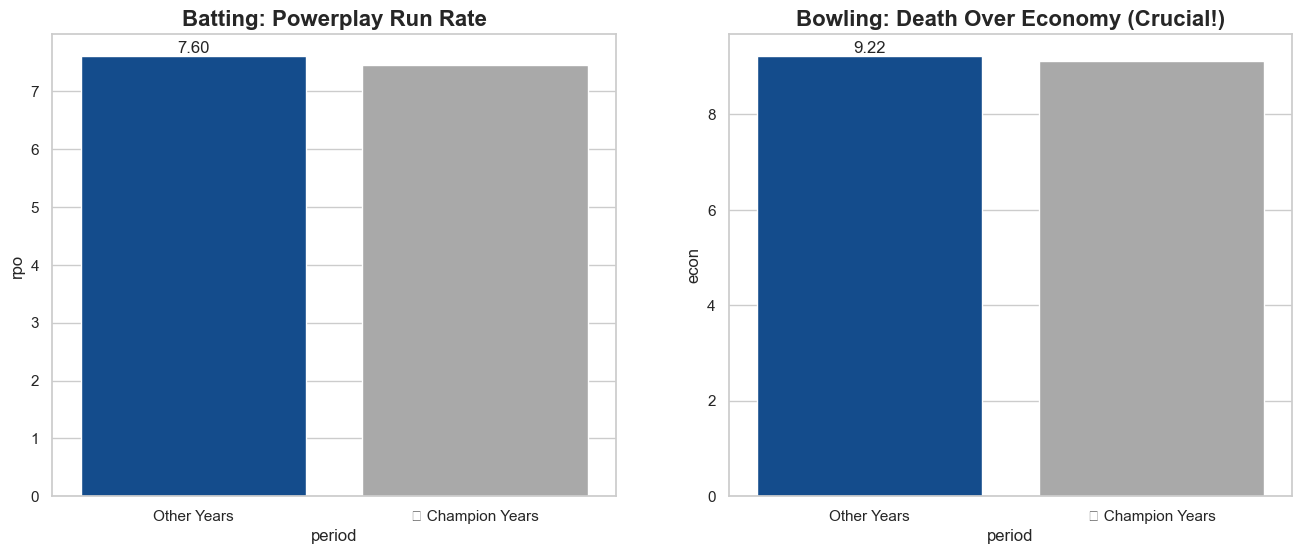

In [ ]:
def get_phase(over):
    if over < 6: return "Powerplay"
    elif over >= 15: return "Death"
    else: return "Middle"

mi_bat["phase"] = mi_bat["over"].apply(get_phase)
mi_bowling["phase"] = mi_bowling["over"].apply(get_phase)

# --- Batting: Powerplay Runs per Over ---
pp_bat = mi_bat[mi_bat["phase"] == "Powerplay"].groupby("period").agg(
    runs=("runs_total", "sum"),
    overs=("valid_ball", lambda x: x.count()/6)
).reset_index()
pp_bat["rpo"] = pp_bat["runs"] / pp_bat["overs"]

# --- Bowling: Death Overs Economy ---
death_bowl = mi_bowling[mi_bowling["phase"] == "Death"].groupby("period").agg(
    runs=("runs_total", "sum"),
    overs=("valid_ball", lambda x: x.count()/6)
).reset_index()
death_bowl["econ"] = death_bowl["runs"] / death_bowl["overs"]

# --- Visualize ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=pp_bat, x="period", y="rpo", ax=ax[0], palette=MI_PALETTE)
ax[0].set_title("Batting: Powerplay Run Rate")
ax[0].bar_label(ax[0].containers[0], fmt="%.2f")

sns.barplot(data=death_bowl, x="period", y="econ", ax=ax[1], palette=MI_PALETTE)
ax[1].set_title("Bowling: Death Over Economy (Crucial!)")
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")

plt.show()

## 3. ⚔️ Strategy: Chasing vs. Defending
Did MI become a better chasing team or a defending fortress in their winning years?

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


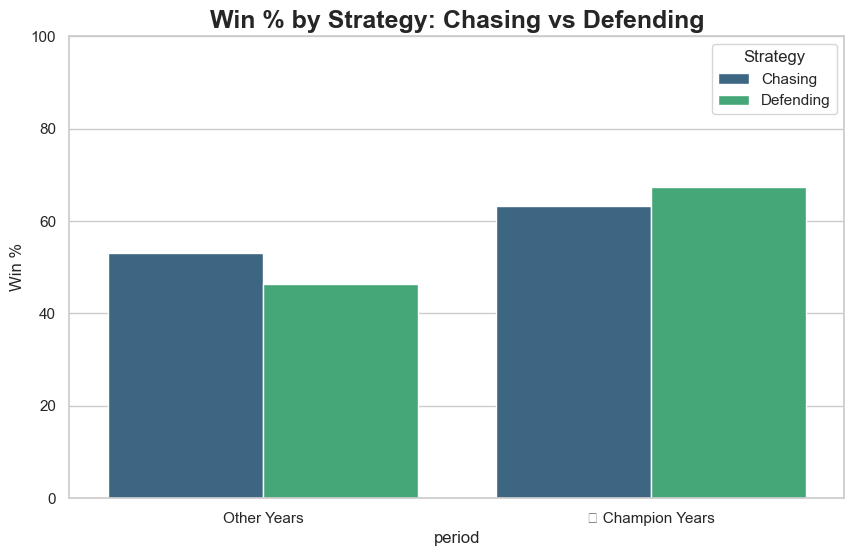

In [ ]:
# Match Level Data
match_data = df[["match_id", "season_year", "toss_winner", "toss_decision", "match_won_by"]].drop_duplicates()
match_data["is_champion_year"] = match_data["season_year"].isin(CHAMPION_YEARS)
match_data["period"] = match_data["is_champion_year"].map({True: "🏆 Champion Years", False: "Other Years"})

# Add MI Win Flag
match_data["mi_win"] = (match_data["match_won_by"] == "Mumbai Indians").astype(int)

# Determine if MI Bat First or Second
# Note: We need to merge with inning data to be 100% sure, but using toss decision is a good proxy if correct.
# Better approach: Check if MI batted in inning 1 or 2 from original DF.

mi_innings = df[(df["batting_team"] == "Mumbai Indians")].groupby(["match_id"])["innings"].min().reset_index()
match_data = pd.merge(match_data, mi_innings, on="match_id", how="left")

# inning 1 = Defending (Setting Target), inning 2 = Chasing
match_data["strategy"] = match_data["innings"].map({1: "Defending", 2: "Chasing"})

# Filter only MI matches (where strategy is known)
mi_matches_strat = match_data.dropna(subset=["strategy"])

strat_stats = mi_matches_strat.groupby(["period", "strategy"]).agg(
    played=("match_id", "count"),
    won=("mi_win", "sum")
).reset_index()

strat_stats["win_pct"] = (strat_stats["won"] / strat_stats["played"]) * 100

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=strat_stats, x="period", y="win_pct", hue="strategy", palette="viridis")
plt.title("Win % by Strategy: Chasing vs Defending", fontsize=18)
plt.ylabel("Win %")
plt.legend(title="Strategy")
plt.ylim(0, 100)
plt.show()

## 4. 🏟️ Fortress Wankhede
Home advantage is key in IPL. How much did Wankhede contribute?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\1774105446.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=home_stats, x="period", y="win_pct", palette=MI_PALETTE)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


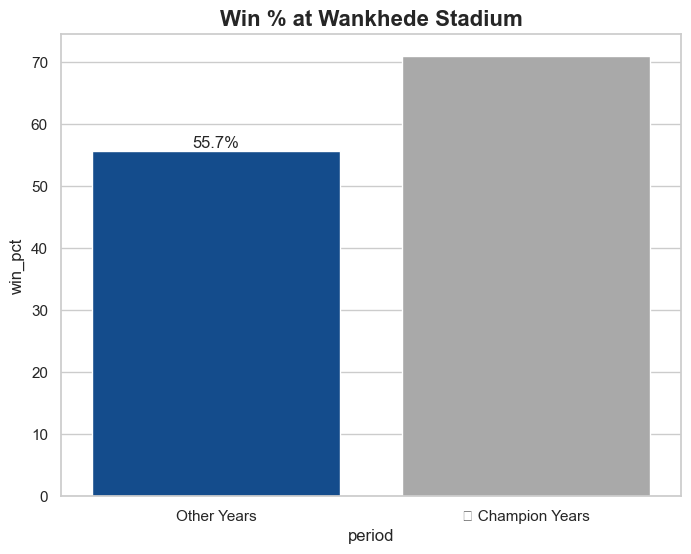

In [ ]:
match_cols = ["match_id", "season_year", "venue", "match_won_by"]
wankhede = df[
    (df["venue"].str.contains("Wankhede", case=False, na=False)) & 
    ((df["batting_team"] == "Mumbai Indians") | (df["bowling_team"] == "Mumbai Indians"))
][match_cols].drop_duplicates()

wankhede["is_champion_year"] = wankhede["season_year"].isin(CHAMPION_YEARS)
wankhede["period"] = wankhede["is_champion_year"].map({True: "🏆 Champion Years", False: "Other Years"})
wankhede["mi_win"] = (wankhede["match_won_by"] == "Mumbai Indians").astype(int)

home_stats = wankhede.groupby("period").agg(
    played=("match_id", "count"),
    won=("mi_win", "sum")
).reset_index()
home_stats["win_pct"] = (home_stats["won"] / home_stats["played"]) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=home_stats, x="period", y="win_pct", palette=MI_PALETTE)
ax.set_title("Win % at Wankhede Stadium")
ax.bar_label(ax.containers[0], fmt="%.1f%%")
plt.show()

## 5. ⭐ Champion Heroes
Who were the MVPs of the 5 Titles? (2013, 2015, 2017, 2019, 2020)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\4115246251.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batters, x="runs_batter", y="batter", ax=ax[0], palette="Blues_r")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19436\4115246251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bowlers, x="bowler_wicket", y="bowler", ax=ax[1], palette="Oranges_r")


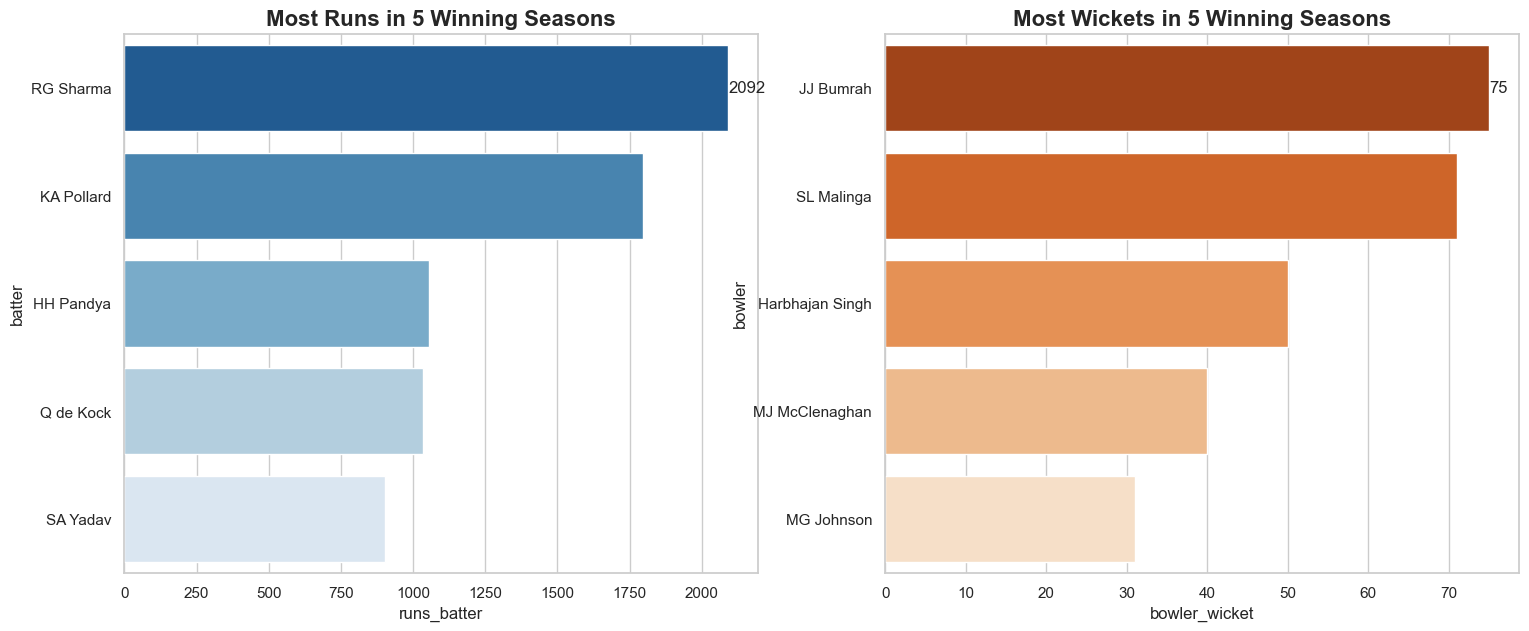

In [13]:
champ_bat = mi_bat[mi_bat["is_champion_year"] == True]
champ_bowl = mi_bowling[mi_bowling["is_champion_year"] == True]

top_batters = champ_bat.groupby("batter")["runs_batter"].sum().nlargest(5).reset_index()
top_bowlers = champ_bowl.groupby("bowler")["bowler_wicket"].sum().nlargest(5).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(data=top_batters, x="runs_batter", y="batter", ax=ax[0], palette="Blues_r")
ax[0].set_title("Most Runs in 5 Winning Seasons")
ax[0].bar_label(ax[0].containers[0])

sns.barplot(data=top_bowlers, x="bowler_wicket", y="bowler", ax=ax[1], palette="Oranges_r")
ax[1].set_title("Most Wickets in 5 Winning Seasons")
ax[1].bar_label(ax[1].containers[0])

plt.show()